In [1]:
from torchmanager_core import devices
from diffusion import DDPMManager as Manager

In [2]:
batch_size: int = 64
data_dir = "~/Public/share/Data/Cifar10"
device = devices.GPUS[1]
image_size = (3, 32, 32)
model_path = "experiments/ddpm_cifar10.exp/checkpoints/last.model"
# pt_model_path = "~/Documents/Models/diffusion.pth"

In [3]:
manager: Manager = Manager.from_checkpoint(model_path, map_location=device) # type: ignore

In [4]:
import data

'''
from torchvision import datasets, transforms

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
preprocessing = transforms.Compose([
    transforms.ToTensor(),
    normalize
])
dataset = datasets.SVHN(data_dir, transform=preprocessing, download=True)
'''

dataset, _, _, _ = data.load_cifar10(data_dir, batch_size, normalize=None, random_flip=False)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
'''
import torch

y_test: list[torch.Tensor] = []
labels: list[torch.Tensor] = []

for img, label in dataset:
    if len(labels) > 10:
        break
    elif label not in labels:
        img_tensor: torch.Tensor = img
        labels.append(label)
        y_test.append(img_tensor.unsqueeze(0))
'''

'\nimport torch\n\ny_test: list[torch.Tensor] = []\nlabels: list[torch.Tensor] = []\n\nfor img, label in dataset:\n    if len(labels) > 10:\n        break\n    elif label not in labels:\n        img_tensor: torch.Tensor = img\n        labels.append(label)\n        y_test.append(img_tensor.unsqueeze(0))\n'

In [6]:
import diffusion, torch

print("Generating images...")
preds: list[torch.Tensor] = manager.predict(batch_size, image_size, device=device, show_verbose=True)
preds = [img.unsqueeze(0) for img in preds]

Generating images...


Sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

Sampling loop time step: 100%|██████████| 1000/1000 [00:28<00:00, 35.51it/s]


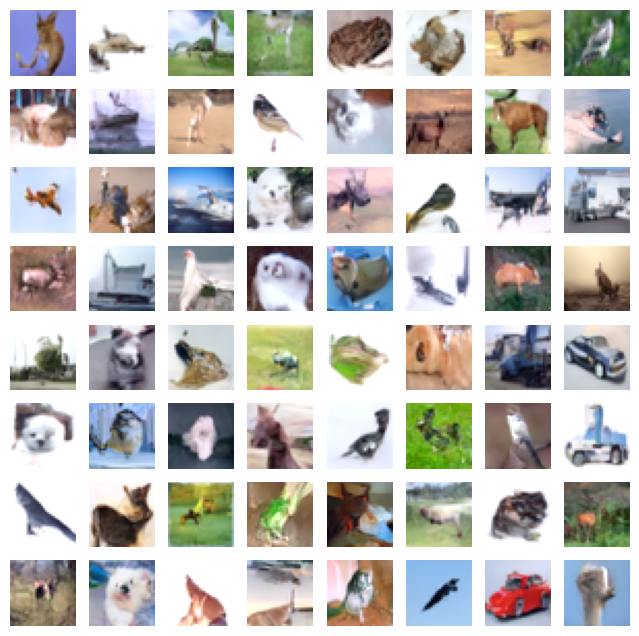

In [7]:
from matplotlib import pyplot as plt

_, axs = plt.subplots(8, 8, figsize=(8, 8))
axs = axs.ravel() # type: ignore

for i, img in enumerate(torch.cat(preds)):
    img = img.cpu()
    img /= (img.max() - img.min())
    img += 0.5
    img = img.clip(0,1)
    axs[i].imshow(img.permute(1,2,0))
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['left'].set_visible(False)

plt.show()